In [1]:
import numpy as np
from matplotlib import pyplot as plt

from utils import load_data, supervised_samples
import config

In [2]:
X_full, y_full, X_test, y_test, classes = load_data()

In [3]:
n_classes = len(classes)
X_train, y_train = supervised_samples(X_full, y_full, config.NUM_LABELLED, n_classes)

(500, 32, 32) (500,)
(10000, 32, 32) (10000,)
Label:  0 - bird


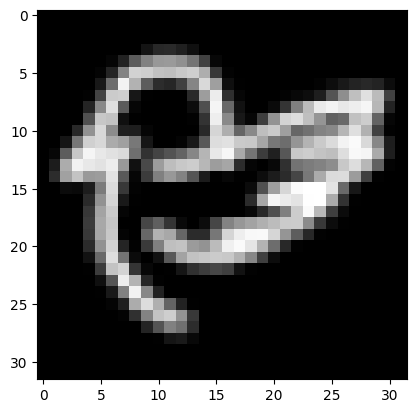

In [5]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

plt.imshow(X_train[0], cmap='gray')
print("Label: ", classes[int(y_train[0])])

In [14]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

In [18]:
def knn(X_train, y_train, test_point, k):
    
    distances = [] # Contains list of tuples (distance, label)
    
    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    
    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [19]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k):
    
    predictions = []
    
    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)
    
    predictions = np.array(predictions)
    
    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

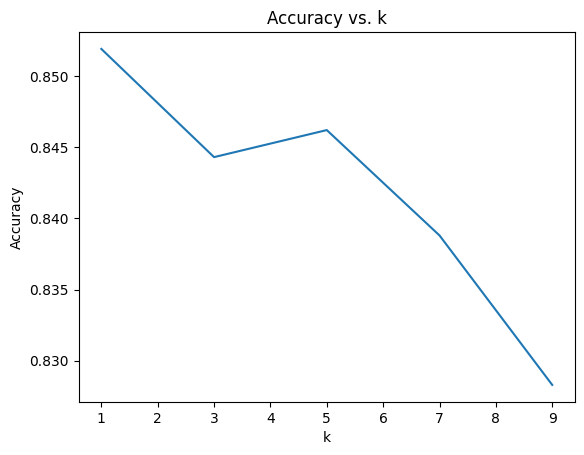

In [21]:
# calculate_accuracy(X_test, y_test, X_train, y_train, k=5)

# Calculate accuracy for different values of k
k_values = [1, 3, 5, 7, 9]
accuracy_values = []

for k in k_values:
    accuracy = calculate_accuracy(X_test, y_test, X_train, y_train, k)
    accuracy_values.append(accuracy)

# Plot the accuracy values
plt.plot(k_values, accuracy_values)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k')
plt.show()

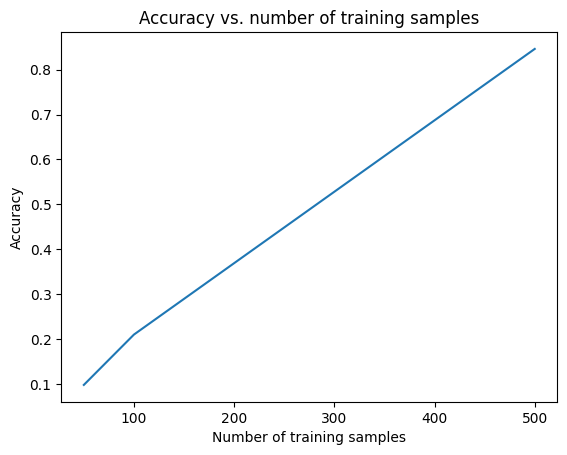

In [24]:
accuracy_values = []
x_values = [50, 100, 500]

for x in x_values:
    accuracy = calculate_accuracy(X_test, y_test, X_train[:x], y_train[:x], k=5)
    accuracy_values.append(accuracy)

# Plot the accuracy values
plt.plot(x_values, accuracy_values)
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. number of training samples')
plt.show()